In [61]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [67]:
df = pd.read_json("results/multivariate/mae.json")

In [68]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=96
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)



df["national_illness"]["patchtst_336"] = df["national_illness"]["patchtst_104"]
# remove index patchtst_104
df = df.drop(index=["patchtst_104"])


/var/folders/03/23xsm68s2z31cb34lbb3rlwh0000gn/T/ipykernel_5619/994240337.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["national_illness"]["patchtst_336"] = df["national_illness"]["patchtst_104"]


In [69]:
df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
timemixer_96,0.973360,0.209628,0.306914,0.473595,0.434218,0.234528,0.221931
itransformer_96,1.530524,0.229580,0.301481,0.460570,0.419593,0.241877,0.222640
vaformer_96,0.904457,0.217358,0.293814,0.457227,0.418255,0.231557,0.205074
moment_512,1.180553,0.241170,0.300821,0.459601,0.371468,0.286987,0.209376
patchtst_336,1.489344,0.223509,0.300685,0.485919,0.372185,0.222996,0.199529


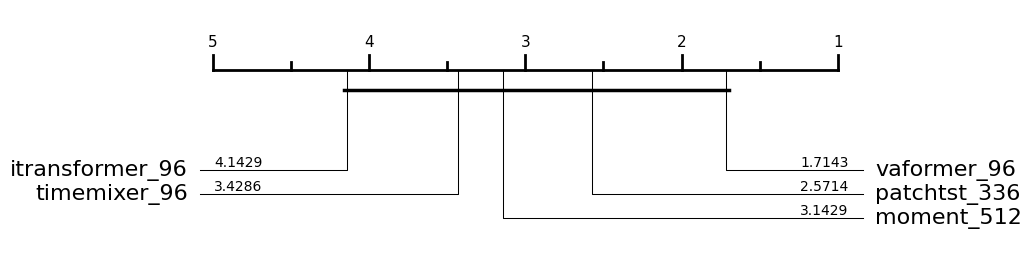

In [70]:
results = df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  